## Step 1: Import libraries and load the dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt


## Step 2: Load and clean data

In [4]:
# Load dataset
df = pd.read_csv("C:/Users/Saurabh/Trim 4/ML/Codsoft/archive (6)/Churn_Modelling.csv")

# Drop irrelevant columns
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Define independent (X) and dependent (y) variables
X = df.drop(columns=["Exited"])
y = df["Exited"]

# Check dataset shape
print(X.shape, y.shape)

(10000, 10) (10000,)


## Step 3: Preprocessing (Encoding + Scaling)

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
categorical_features = ["Geography", "Gender"]

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough"  # keeps HasCrCard, IsActiveMember
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['Geography', 'Gender'])])

In [7]:
import pandas as pd

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)

# Get new feature names (encoded + numeric + passthrough)
num_feats = numeric_features
cat_feats = preprocessor.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(categorical_features)
binary_feats = ["HasCrCard", "IsActiveMember"]
feature_names = list(num_feats) + list(cat_feats) + binary_feats

# Convert to DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# View data
print(X_processed_df.head())     # First 5 rows
print(X_processed_df.shape)      # Shape of processed data
print(X_processed_df.columns)    # Column names


   CreditScore       Age    Tenure   Balance  NumOfProducts  EstimatedSalary  \
0    -0.326221  0.293517 -1.041760 -1.225848      -0.911583         0.021886   
1    -0.440036  0.198164 -1.387538  0.117350      -0.911583         0.216534   
2    -1.536794  0.293517  1.032908  1.333053       2.527057         0.240687   
3     0.501521  0.007457 -1.387538 -1.225848       0.807737        -0.108918   
4     2.063884  0.388871 -1.041760  0.785728      -0.911583        -0.365276   

   Geography_Germany  Geography_Spain  Gender_Male  HasCrCard  IsActiveMember  
0                0.0              0.0          0.0        1.0             1.0  
1                0.0              1.0          0.0        0.0             1.0  
2                0.0              0.0          0.0        1.0             0.0  
3                0.0              0.0          0.0        0.0             0.0  
4                0.0              1.0          0.0        1.0             1.0  
(10000, 11)
Index(['CreditScore', 'Age'

## Step 4: Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Step 5: Build Logistic Regression Model

In [11]:
log_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear"))
])

# Fit model
log_reg_model.fit(X_train, y_train)

C:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

## Step 6: Model Evaluation (Predictions and probabilities)

In [13]:
y_pred = log_reg_model.predict(X_test)
y_prob = log_reg_model.predict_proba(X_test)[:, 1]

## Performance metrics

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8085
Precision: 0.59375
Recall: 0.18673218673218672
F1 Score: 0.2841121495327103
ROC AUC: 0.7748009951399781

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
[[1541   52]
 [ 331   76]]


## Step 7: ROC Curve

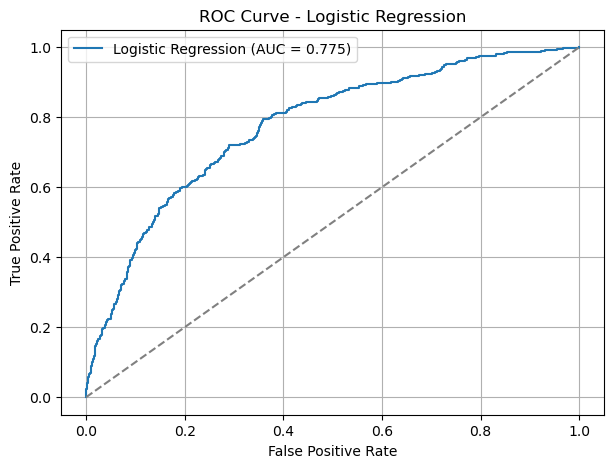

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %.3f)" % roc_auc_score(y_test, y_prob))
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


## Step 8: Feature Importance (Coefficients)

In [19]:
# Fit preprocessor alone
preprocessor.fit(X_train)

# Get final feature names
num_feats = numeric_features
cat_feats = preprocessor.named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(categorical_features)
feature_names = list(num_feats) + list(cat_feats) + ["HasCrCard", "IsActiveMember"]

# Extract coefficients
coefficients = log_reg_model.named_steps["classifier"].coef_[0]
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Abs(Coeff)": abs(coefficients)
}).sort_values(by="Abs(Coeff)", ascending=False)

print(feature_importance)


              Feature  Coefficient  Abs(Coeff)
10     IsActiveMember    -1.029442    1.029442
6   Geography_Germany     0.817667    0.817667
1                 Age     0.738349    0.738349
8         Gender_Male    -0.524534    0.524534
3             Balance     0.161219    0.161219
0         CreditScore    -0.085943    0.085943
9           HasCrCard    -0.073660    0.073660
4       NumOfProducts    -0.070281    0.070281
5     EstimatedSalary     0.047726    0.047726
7     Geography_Spain     0.040586    0.040586
2              Tenure    -0.020011    0.020011


In [26]:
# Recreate and train the Logistic Regression pipeline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Load data
df = pd.read_csv("C:/Users/ishaa/OneDrive - Niranjanlal Dalmia Educational Society/Backup/N L Dalmia/Study/Trimester 5/Machine Learning/Codsoft/Customer Churn Dataset/Churn_Modelling.csv")
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Split features and target
X = df.drop(columns=["Exited"])
y = df["Exited"]

# Define features
numeric_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
categorical_features = ["Geography", "Gender"]

# Preprocessing
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(drop="first", sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="passthrough"
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build pipeline
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Fit model
log_reg_pipeline.fit(X_train, y_train)


C:\Users\ishaa\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Geography', 'Gender'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

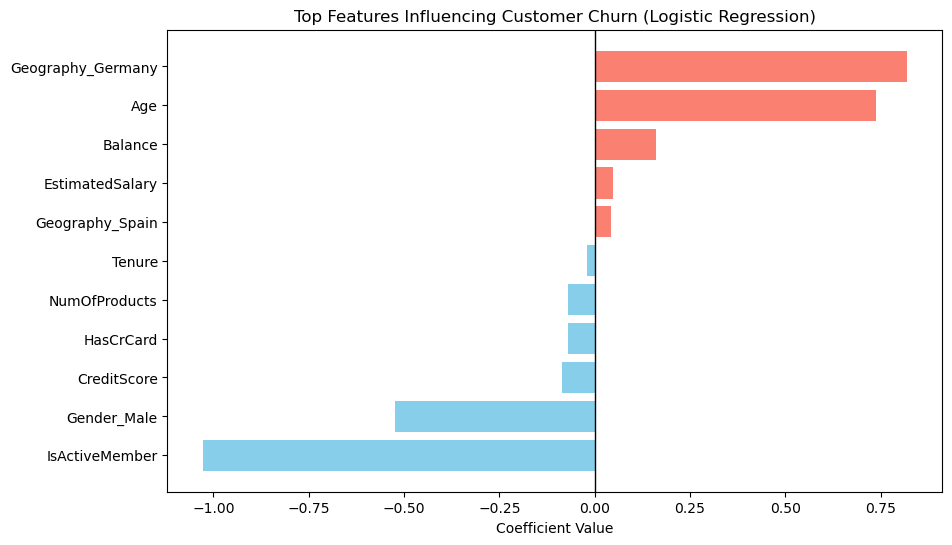

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Extract trained logistic regression model
log_reg_model = log_reg_pipeline.named_steps["classifier"]

# Get all feature names after preprocessing
num_feats = numeric_features
cat_feats = log_reg_pipeline.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(categorical_features)
binary_feats = ["HasCrCard", "IsActiveMember"]
feature_names = list(num_feats) + list(cat_feats) + binary_feats

# Extract coefficients
coefficients = log_reg_model.coef_[0]

# Combine into DataFrame
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", ascending=False)

# Plot feature influence
plt.figure(figsize=(10,6))
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color=np.where(coef_df["Coefficient"] > 0, "salmon", "skyblue"))
plt.xlabel("Coefficient Value")
plt.title("Top Features Influencing Customer Churn (Logistic Regression)")
plt.axvline(0, color="black", linewidth=1)
plt.gca().invert_yaxis()
plt.show()


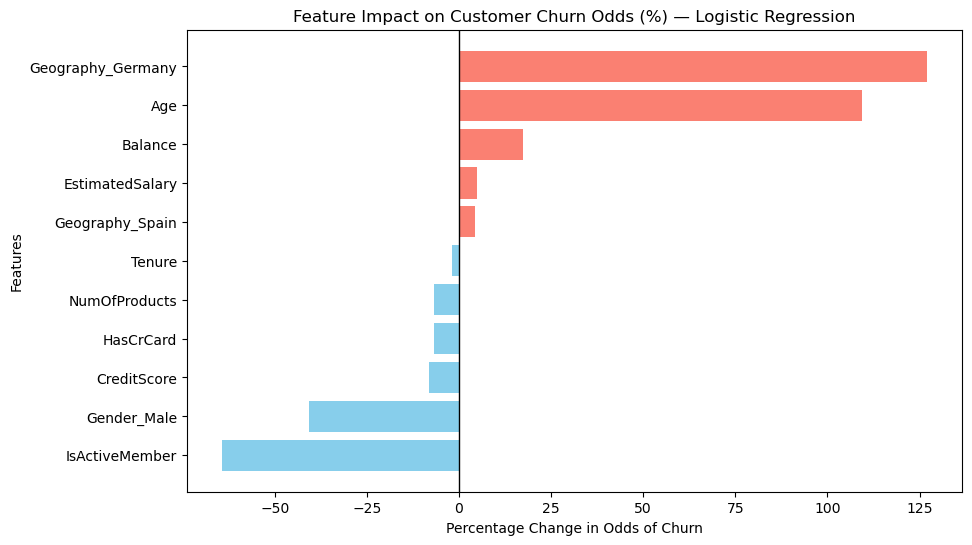

              Feature  Coefficient  Odds_Ratio  Effect (%)
6   Geography_Germany     0.819585    2.269557  126.955707
1                 Age     0.738453    2.092695  109.269510
3             Balance     0.161093    1.174794   17.479391
5     EstimatedSalary     0.047666    1.048820    4.881990
7     Geography_Spain     0.042508    1.043424    4.342408
2              Tenure    -0.020096    0.980105   -1.989548
4       NumOfProducts    -0.070423    0.931999   -6.800076
9           HasCrCard    -0.070516    0.931913   -6.808725
0         CreditScore    -0.085893    0.917692   -8.230799
8         Gender_Male    -0.523155    0.592648  -40.735230
10     IsActiveMember    -1.028157    0.357665  -64.233454


In [32]:
import numpy as np
import pandas as pd

# Extract logistic regression model
log_reg_model = log_reg_pipeline.named_steps["classifier"]

# Get feature names from preprocessor
num_feats = numeric_features
cat_feats = log_reg_pipeline.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"].get_feature_names_out(categorical_features)
binary_feats = ["HasCrCard", "IsActiveMember"]
feature_names = list(num_feats) + list(cat_feats) + binary_feats

# Extract coefficients
coefficients = log_reg_model.coef_[0]

# Convert coefficients to odds ratios
odds_ratios = np.exp(coefficients)

# Create interpretation DataFrame
coef_summary = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Odds_Ratio": odds_ratios,
    "Effect (%)": (odds_ratios - 1) * 100
}).sort_values(by="Coefficient", ascending=False)

# --- Plot ---
plt.figure(figsize=(10, 6))
colors = np.where(coef_summary["Effect (%)"] > 0, "salmon", "skyblue")

plt.barh(coef_summary["Feature"], coef_summary["Effect (%)"], color=colors)
plt.axvline(0, color="black", linewidth=1)
plt.title("Feature Impact on Customer Churn Odds (%) — Logistic Regression", fontsize=12)
plt.xlabel("Percentage Change in Odds of Churn")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

# Display table for reference
print(coef_summary)